## Model Training

#### Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
#Modelling
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.simplefilter('ignore')

### Import the CSV Data as Pandas DataFrame


In [53]:
df = pd.read_csv('data/stud.csv')

In [54]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


## Preparing X and y values

In [55]:
X = df.drop(columns='math_score',axis=1)
y = df['math_score']


In [56]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


### Printing all categories in all variables

In [57]:
print('Categories in Gender:         ',end= ' ')
print(df['gender'].unique())
print('Categories in Race Ethnicity:         ',end= ' ')
print(df['race_ethnicity'].unique())
print('Categories in Parental Level of Education:         ',end= ' ')
print(df['parental_level_of_education'].unique())
print('Categories in Lunch:         ',end= ' ')
print(df['lunch'].unique())
print('Categories in Test Preparation Course:         ',end= ' ')
print(df['test_preparation_course'].unique())

Categories in Gender:          ['female' 'male']
Categories in Race Ethnicity:          ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in Parental Level of Education:          ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in Lunch:          ['standard' 'free/reduced']
Categories in Test Preparation Course:          ['none' 'completed']


In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns


oh_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ],
    remainder='passthrough'
)




In [59]:
X = preprocessor.fit_transform(X)

In [60]:
X.shape

(1000, 19)

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)
X_train.shape,X_test.shape

((750, 19), (250, 19))

In [62]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = root_mean_squared_error(true,predicted)
    r_square = r2_score(true,predicted)
    return mae,mse,rmse,r_square

In [63]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae ,model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae ,model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2972
- Mean Absolute Error: 4.2383
- Mean Squared Error: 28.0608
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4825
- Mean Absolute Error: 4.3379
- Mean Squared Error: 30.0581
- R2 Score: 0.8778


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5515
- Mean Absolute Error: 5.1837
- Mean Squared Error: 42.9223
- R2 Score: 0.8077
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.6541
- Mean Absolute Error: 5.2217
- Mean Squared Error: 44.2775
- R2 Score: 0.8200


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2976
- Mean Absolute Error: 4.2368
- Mean Squared Error: 28.0642
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4788
- Mean Absolute Error: 4.3354
- Mean Squared Error: 30.0173
- R2

In [64]:
df2 = pd.DataFrame({
    "Model Name": model_list,
    "R2 Value": r2_list
})

df2_sorted = df2.sort_values(by="R2 Value", ascending=True)






In [65]:
df2

,Model Name,R2 Value
0,Linear Regression,0.877824
1,Lasso,0.820027
2,Ridge,0.877990
3,K-Neighbors Regressor,0.793207
4,Decision Tree,0.772867
5,Random Forest Regressor,0.847036
6,XGBRegressor,0.836290
7,CatBoosting Regressor,0.854830
8,AdaBoost Regressor,0.842542


### The Best Model

In [66]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.78


### Plot y pred and y_test 


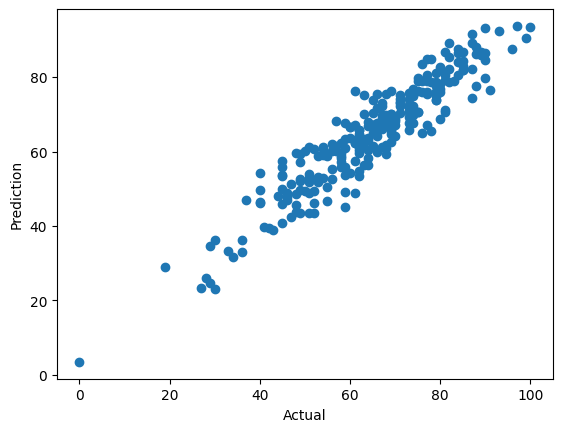

In [67]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

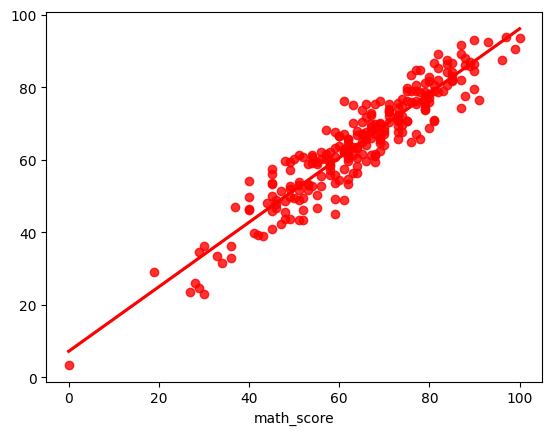

In [68]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

### Difference between actual and predicted value

In [69]:
pred_df = pd.DataFrame(
    {
        'Actual Value': y_test,
        'Predicted value': y_pred,
        'Difference': y_test - y_pred,
    }
)
pred_df

,Actual Value,Predicted value,Difference
521,91,76.415556,14.584444
737,53,58.835356,-5.835356
740,80,76.907370,3.092630
660,74,76.760032,-2.760032
411,84,87.454007,-3.454007
...,...,...,...
109,70,64.035129,5.964871
430,64,63.158496,0.841504
77,80,82.733853,-2.733853
84,42,39.387374,2.612626
